# Importando as bibliotecas necessárias

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,pi,factorial  

# Fazendo a leitura das imagens

In [47]:
# imagens é uma lista que vai armazenar as imagens lidas do diretório ./imagens/frame0.jpg até ./imagens/frame9.jpg
# plt.imread é uma função da biblioteca matplotlib que lê uma imagem de um arquivo 
# e retorna um array numpy representando a imagem
# o loop for itera de 0 a 9 (10 imagens no total) e para cada valor de i, 
# lê a imagem correspondente e a adiciona à lista imagens
imagens = []
for i in range(0,10):
    imagens.append(plt.imread(f"./imagens/frame{i}.jpg"))

# Tratamento os dados

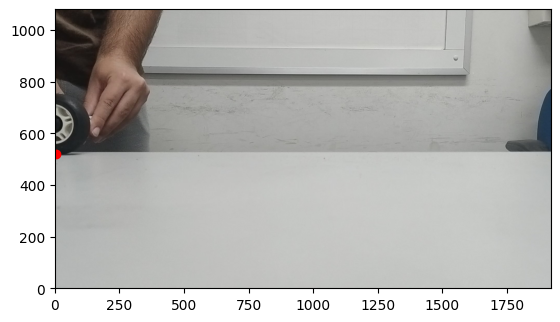

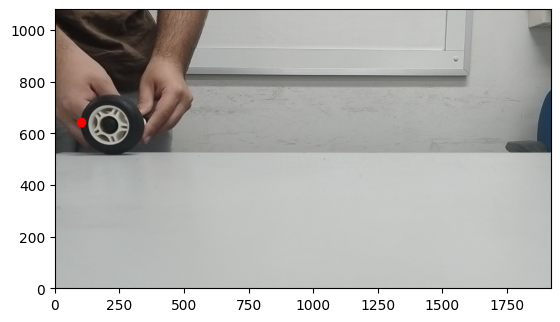

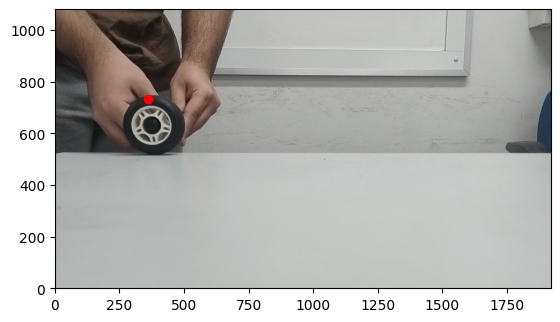

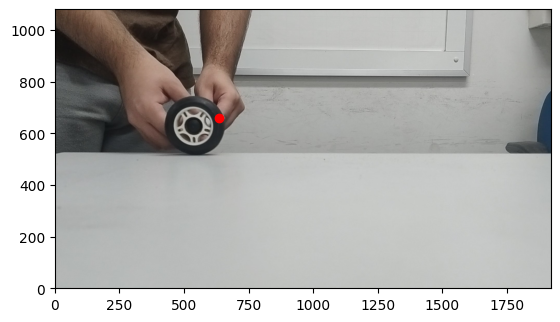

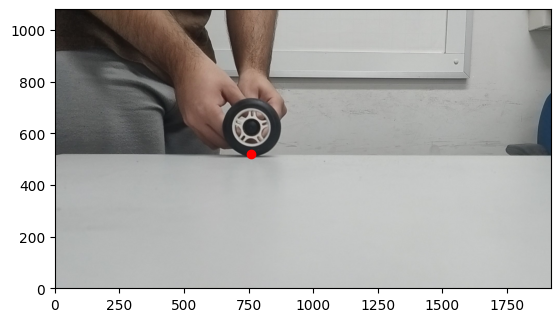

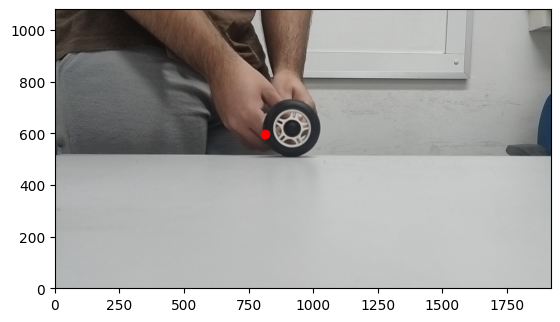

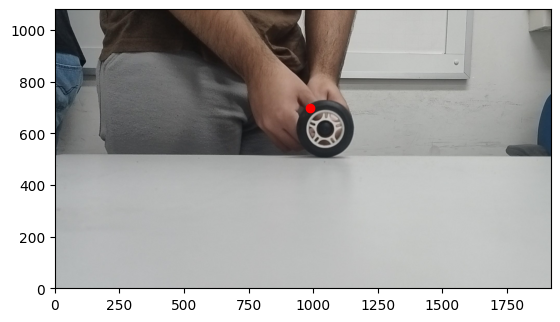

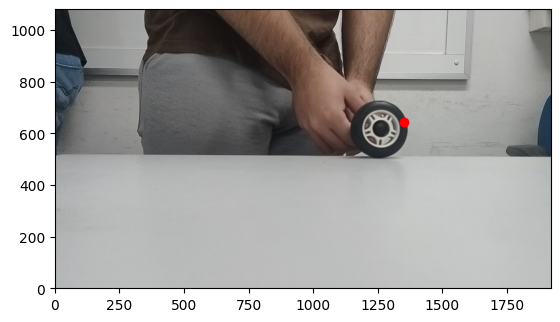

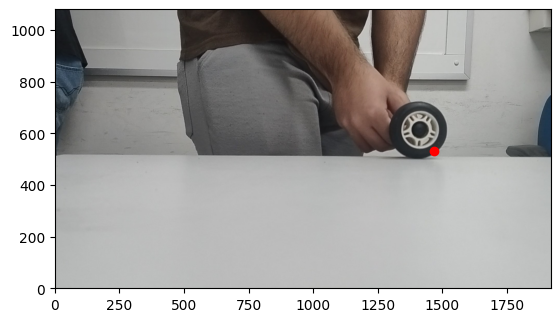

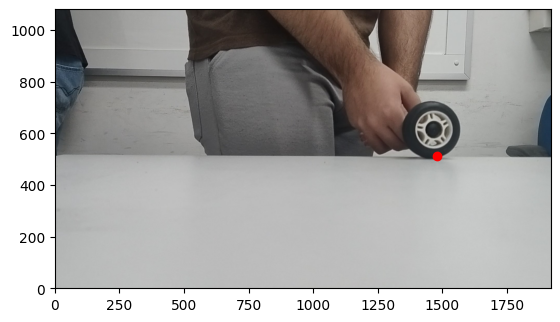

In [48]:
# cooredenadas dos pontos no eixo x obtidos pelo paint
px = np.array([4, 103, 360, 636, 758, 815, 986, 1350, 1466, 1479])

# coordenadas dos pontos no eixo y obtidos pelo paint mas subtraídos de 1080 que é a altura da imagem para inverter o eixo y
# que por default começa em 0 no topo da imagem porém não é assim que queremos trabalhar
py = 1080 - np.array([560, 438, 349, 421, 561, 482, 383, 436, 549, 567])

# plotando os pontos nas imagens
for i in range(0,10):
  plt.plot(px[i], py[i], 'ro')
  h, w, chanels = imagens[i].shape
  plt.imshow(imagens[i], extent=[0, w, 0, h])
  plt.show()

raio = (1023-804)/2

# Função que calcula série de Taylor para aproximar o movimento da ciclóide em x:

In [49]:
def taylor_x(t0,n,t,r):
  #argumentos da função:
  # t0: ponto em que a série é centrada
  # n: número de termos da série
  # t: ponto em que a série é avaliada
  # r: raio da ciclóide

  # cálculo da distância entre t e t0
  h=t-t0

  # inicialização do valor da série
  result_aprox=0

  # cálculo dos primeiros termos da série
  # termo independente
  if n>=1:
    result_aprox = result_aprox + (r*(t0 - np.sin(t0)))

  # termo linear
  if n>=2:
    result_aprox = result_aprox + (r*(1-np.cos(t0))*h)
  
  # termo quadrático
  if n>=3:
    result_aprox = result_aprox + ((r*np.sin(t0)*(h**2))/2)
  
  derivada=0 #<- isso não é necessário no Python, mas é uma boa prática inicializar variáveis

  # loop para calcular os termos de ordem 3 até n -> isso é garantido pelo range(3, ->n+1<- )
  # termos de ordem superior
  for i in range(3,n+1):
    # cálculo da i-ésima derivada de x(t) no ponto t0
    # como as derivadas de x(t) se repetem a cada 4 ordens, 
    # usamos i%4 para determinar qual derivada calcular
    # i%4==0 -> 4ª, 8ª, 12ª,... derivada
    if i%4==3:
      derivada=np.cos(t0)
    # i%4==1 -> 5ª, 9ª, 13ª,... derivada
    elif i%4==0:
      derivada=-np.sin(t0)
    # i%4==2 -> 6ª, 10ª, 14ª,... derivada
    elif i%4==1:
      derivada=-np.cos(t0)
    # i%4==3 -> 7ª, 11ª, 15ª,... derivada
    elif i%4==2:
      derivada=np.sin(t0)
    # cálculo do termo i-ésimo da série e adição ao resultado
    result_aprox = result_aprox + ((derivada * h**(i))/factorial(i))
  
  return result_aprox

# Função que calcula série de Taylor para aproximar o movimento da ciclóide em y:

In [50]:
def taylor_y(t0,n,t,r):
  #argumentos da função:
  # t0: ponto em que a série é centrada
  # n: número de termos da série
  # t: ponto em que a série é avaliada
  # r: raio da ciclóide
  
  # cálculo da distância entre t e t0
  h=t-t0
  
  # inicialização do valor da série
  result_aprox=0
  # cálculo dos primeiros termos da série
  # termo independente
  if n>=1:
    result_aprox = result_aprox + (r - r * np.cos(t0*pi))
  
  # termo linear
  if n>=2:
    result_aprox = result_aprox + (r * np.sin(t0)*h)
  
  # loop para calcular os termos de ordem 2 até n -> isso é garantido pelo range(2, ->n+1<- )
  # termos de ordem superior
  for i in range(2,n+1):
    # cálculo da i-ésima derivada de y(t) no ponto t0
    # como as derivadas de y(t) se repetem a cada 4 ordens,
    # usamos i%4 para determinar qual derivada calcular
    # i%4==2: -> 2ª, 6ª, 10
    if i%4==2:
      derivada=np.cos(t0)
    # i%4==1: -> 3ª, 7ª, 11ª,... derivada
    elif i%4==3:
      derivada=-np.sin(t0)
    # i%4==0 -> 4ª, 8ª, 12ª,... derivada
    elif i%4==0:
      derivada=-np.cos(t0)
    # i%4==3 -> 5ª, 9ª, 13ª,... derivada
    elif i%4==1:
      derivada=np.sin(t0)
    # cálculo do termo i-ésimo da série e adição ao resultado
    result_aprox = result_aprox + ((derivada * h**(i))/factorial(i))
  
  return result_aprox

# Plotando o gráfico do movimento da ciclóide em X e Y

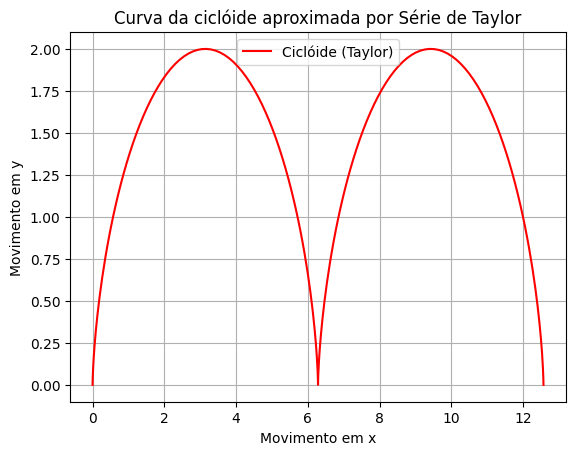

In [51]:
# criando um vetor de valores para calcular o movimento da ciclóide em X com 200 pontos no total variando de 0 a 4*pi
x=np.linspace(0, 4*pi ,200)
# criando um vetor de valores para calcular o movimento da ciclóide em Y com 200 pontos no total variando de 0 a 4*pi
y=np.linspace(0, 4*pi ,200)

# a função linspace cria um vetor de 200 pontos igualmente espaçados entre 0 e 4*pi

# a função enumerate serve para iterar sobre os elementos de uma lista (ou array) e obter tanto o índice quanto o valor do elemento em cada iteração
# i é o índice e v é o valor do elemento
# isso é útil quando queremos modificar os elementos de uma lista com base em seu índice
for i,valor_avaliado_em_x in enumerate(x):
  x[i]=taylor_x(0, 80 , valor_avaliado_em_x , raio)

#a função enumerate serve para iterar sobre os elementos de uma lista (ou array) e obter tanto o índice quanto o valor do elemento em cada iteração
# i é o índice e valor_avaliado_em_y é o valor do elemento
# isso é útil quando queremos modificar os elementos de uma lista com base em seu índice
for i,valor_avaliado_em_y in enumerate(y):
  y[i]=taylor_y(0 , 80 , valor_avaliado_em_y , raio)

# plotando os pontos nas imagens
plt.plot(x, y, 'r' ,label='Ciclóide (Taylor)')
plt.xlabel('Movimento em x')
plt.ylabel('Movimento em y')
plt.title('Curva da ciclóide aproximada por Série de Taylor')
plt.legend()
plt.grid(True)
plt.show()